https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/cohorts/2024/03-orchestration/homework.md

The goal of this homework is to train a simple model for predicting the duration of a ride, but use `Mage` for it.

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page), the Yellow taxi data for 2023.

In [1]:
url_yellow_mar_2023 = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet'

# Question 1. Run Mage

What's the version of Mage we run?

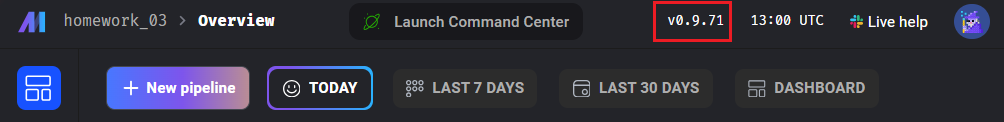

Answer: __0.9.71__

# Question 2. Creating a project

Now let's create a new project. We can call it "homework_03", for example.

How many lines are in the created `metadata.yaml` file?